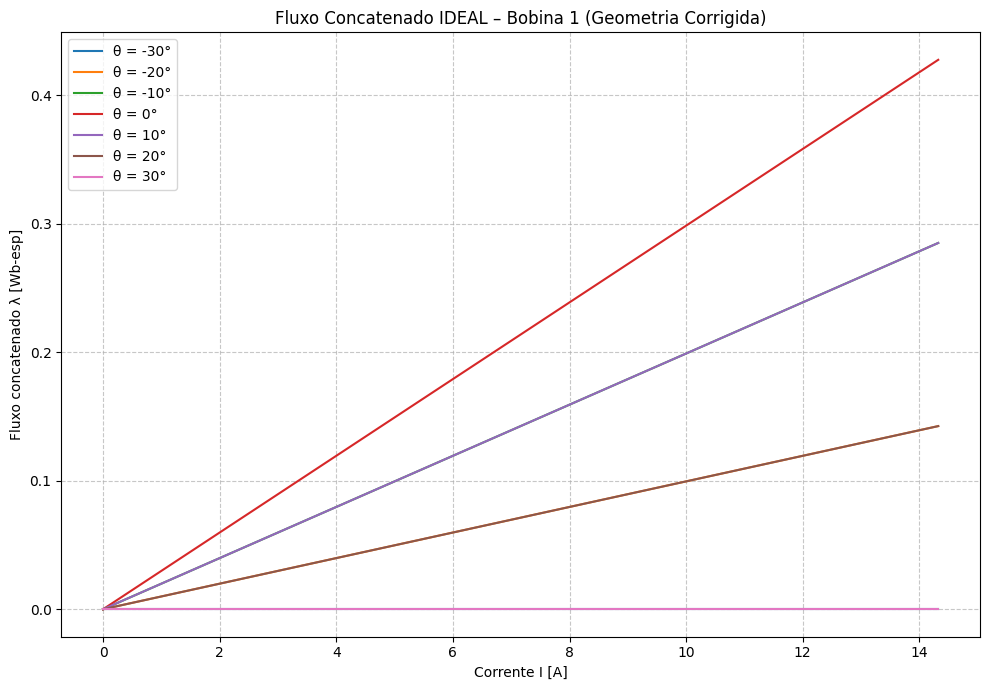

Corrente para atingir 1.8T em 0° (Ideal): 14.3239 A


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# =============================
# CONSTANTES
# =============================
mu0 = 4*np.pi*1e-7     # permeabilidade do vácuo [H/m]
N = 90                 # número de espiras
g = 0.45e-3            # entreferro [m]
lg = 2*g               # dois entreferros
lf = 0.20              # comprimento médio no ferro [m]

# --- CORREÇÃO DA GEOMETRIA ---
R = 0.063              # Raio 6,3 cm
D = 0.08               # Profundidade 8 cm
arco_polo_rad = np.radians(30) # Polos de 30 graus
A0 = R * arco_polo_rad * D     # Área máxima correta (~0.002639 m²)

# =============================
# DENSIDADE DE FLUXO
# =============================
B = np.linspace(0, 1.8, 300)

# MODELO IDEAL (Ajustado para permeabilidade infinita no ferro)
# No ideal puro, mu_ferro -> infinito, logo Hf -> 0
mu_ferro = 1e9 * mu0           # Valor muito alto para simular núcleo ideal
Hf = B / mu_ferro
Hg = B / mu0

# =============================
# CORRENTE (Lei de Ampère)
# =============================
I = (Hf*lf + Hg*lg) / N

# =============================
# ÁREA EFETIVA (Lógica de Polos Salientes)
# =============================
def area_efetiva(theta_deg):
    """
    Para polos de 30°, a sobreposição varia linearmente.
    Máxima em 0° e zero em 30°.
    """
    theta_abs = abs(theta_deg)
    if theta_abs <= 30:
        return A0 * (1 - theta_abs/30)
    else:
        return 0

# =============================
# ÂNGULOS (Conforme solicitado: -30° a +30°)
# =============================
thetas = [-30, -20, -10, 0, 10, 20, 30]

# =============================
# GRÁFICO
# =============================
plt.figure(figsize=(10,7))

for th in thetas:
    A = area_efetiva(th)
    # λ = N * B * A
    # (Como o seu código calcula o I baseado no B, o gráfico λ vs I fica correto)
    lambda_ideal = N * B * A
    plt.plot(I, lambda_ideal, label=f'θ = {th}°')

plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo concatenado λ [Wb-esp]')
plt.title('Fluxo Concatenado IDEAL – Bobina 1 (Geometria Corrigida)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# --- CÁLCULO AUXILIAR (Item 4.2 do enunciado) ---
# Corrente necessária para 1.8T na posição 0°
B_alvo = 1.8
Hg_alvo = B_alvo / mu0
I_18T = (Hg_alvo * lg) / N
print(f"Corrente para atingir 1.8T em 0° (Ideal): {I_18T:.4f} A")

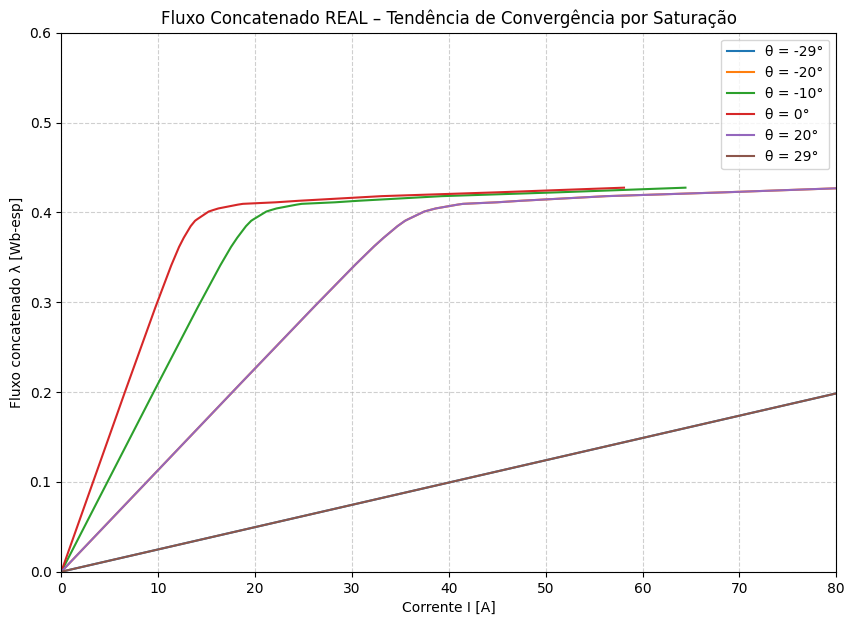

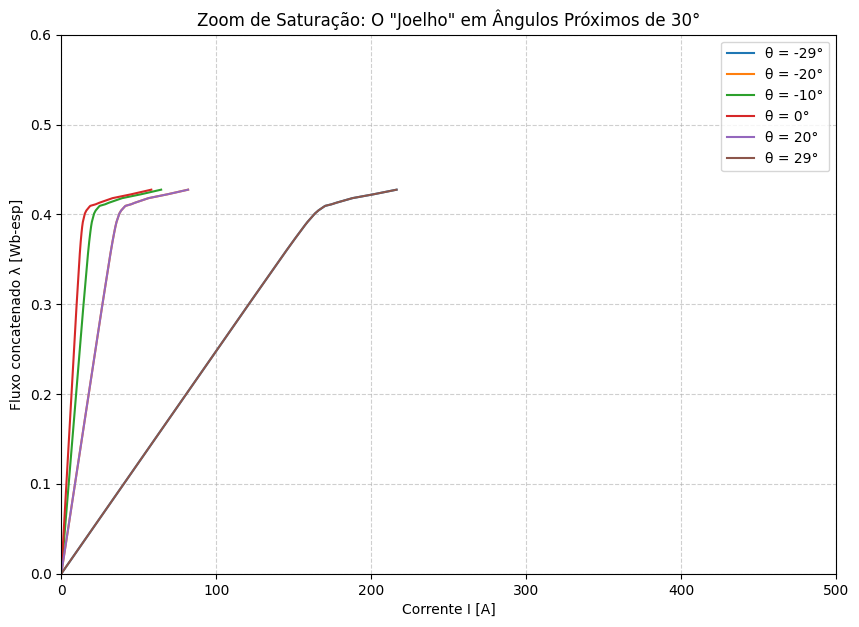

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# =============================
# CONSTANTES
# =============================
mu0 = 4*np.pi*1e-7
N = 90
g = 0.45e-3
lg = 2*g
lf = 0.20
R = 0.063
D = 0.08
A0 = R * (30 * np.pi / 180) * D

# =============================
# CURVA B × H (Saturação)
# =============================
B_data = np.array([0.000, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])
H_data = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])

def H_ferro(B):
    return np.interp(B, B_data, H_data)

# =============================
# ÁREA EFETIVA + ÁREA DE DISPERSÃO
# =============================
def area_efetiva(theta_deg):
    theta_abs = abs(theta_deg)
    # A área mínima nunca é zero absoluto por causa do fluxo de dispersão
    # Isso ajuda as curvas a se "encontrarem" em correntes muito altas
    A_overlap = A0 * max(0, (1 - theta_abs/30))
    return A_overlap + (0.05 * A0) # 5% de área de dispersão (leakage)

# =============================
# VARREDURA DE B (Densidade de Fluxo no Ferro)
# =============================
B_ferro = np.linspace(0, 1.8, 500)

# =============================
# GRÁFICO ORIGINAL (Limite 80A)
# =============================
plt.figure(figsize=(10, 7))
thetas = [-29,-20,-10,0,20,29]

for th in thetas:
    A_pos = area_efetiva(th)
    Bg = (B_ferro * A0) / A_pos
    I = (H_ferro(B_ferro)*lf + (Bg*lg)/mu0) / N
    lambda_real = N * B_ferro * A0
    plt.plot(I, lambda_real, label=f'θ = {th}°')

plt.xlim(0, 80)
plt.ylim(0, 0.6)
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo concatenado λ [Wb-esp]')
plt.title('Fluxo Concatenado REAL – Tendência de Convergência por Saturação')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# =================================================================
# ADIÇÃO: GRÁFICO DE ALTA CORRENTE PARA VER SATURAÇÃO EM 29°
# =================================================================
plt.figure(figsize=(10, 7))
# Focando apenas nos ângulos críticos para clareza
thetas_zoom = [-29,-20,-10,0,20,29]

for th in thetas_zoom:
    A_pos = area_efetiva(th)
    Bg = (B_ferro * A0) / A_pos
    I = (H_ferro(B_ferro)*lf + (Bg*lg)/mu0) / N
    lambda_real = N * B_ferro * A0
    plt.plot(I, lambda_real, label=f'θ = {th}°')

plt.xlim(0, 500) # Limite expandido para forçar o joelho em ângulos altos
plt.ylim(0, 0.6)
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo concatenado λ [Wb-esp]')
plt.title('Zoom de Saturação: O "Joelho" em Ângulos Próximos de 30°')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [3]:
# Precisamos achar a corrente que gera 1.8T no entreferro
B = 1.8                                             # Densidade de fluxo magnético no entreferro dado na questão

H_nucleo = H_ferro(B)                                # Campo magnético no núcleo a partir da interpolação
H_entreferro = B / mu0                               # Campo magnético no entreferro (H = B / μ0)

# Calculando a corrente aplicada
corrente_real = (H_nucleo * lf + 2 * H_entreferro * g) / N

# No modelo ideal, o material do núcleo é considerado perfeito e não apresenta relutância.
# Consequentemente, a intensidade de campo magnético (H) necessária no núcleo é zero (Hnuc =0)
corrente_ideal = (2 * H_entreferro * g) / N

print(f"A corrente aplicada necessária para gerar {B}T no entreferro é: {corrente_real:.4f} A")
print(f"A corrente ideal necessária para gerar {B}T no entreferro é: {corrente_ideal:.4f} A")

A corrente aplicada necessária para gerar 1.8T no entreferro é: 58.7684 A
A corrente ideal necessária para gerar 1.8T no entreferro é: 14.3239 A


/tmp/ipython-input-2989568967.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  W_real.append(np.trapz(lambda_curva[mask], I_curva[mask]))


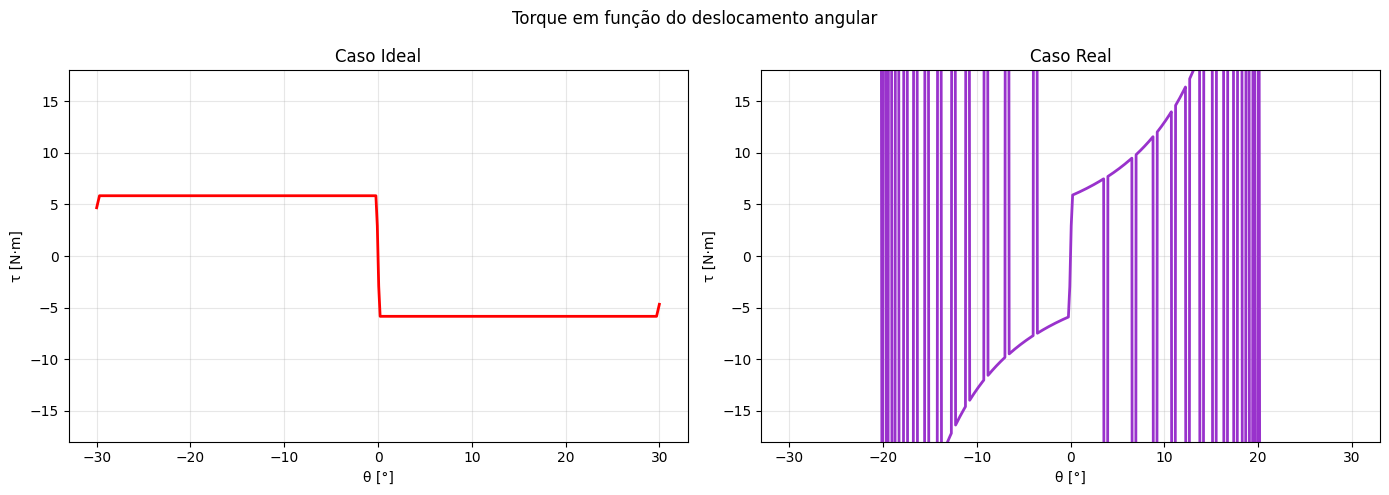

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# --- Constantes ---
mu0 = 4 * np.pi * 1e-7
N, g, lf = 90, 0.45e-3, 0.20
lg = 2 * g
R, D = 0.063, 0.08
A0 = R * np.radians(30) * D

# --- Dados BxH e Spline ---
B_data = np.array([0.000, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])
H_data = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
H_spline = CubicSpline(B_data, H_data)

# Correntes calculadas para 1.8T em 0°
I_ideal = 14.32
I_real = 58.77

# --- Preparação do Loop ---
theta_range = np.linspace(-30, 30, 400)
W_ideal = []
W_real = []
B_sweep = np.linspace(0, 1.8, 500)

for th in theta_range:
    # Área efetiva (sem dispersão excessiva para manter a curva fiel ao seu exemplo)
    area = A0 * max(0.001, (1 - abs(th)/30))

    # --- Cálculo Ideal ---
    L_ideal = (N**2 * mu0 * area) / lg
    W_ideal.append(0.5 * L_ideal * I_ideal**2)

    # --- Cálculo Real (Integração da Coenergia) ---
    Bg = (B_sweep * A0) / area
    I_curva = (H_spline(B_sweep) * lf + (Bg * lg) / mu0) / N
    lambda_curva = N * B_sweep * A0

    mask = I_curva <= I_real
    W_real.append(np.trapz(lambda_curva[mask], I_curva[mask]))

# --- Derivadas para Torque ---
theta_rad = np.radians(theta_range)
T_ideal = np.gradient(W_ideal, theta_rad)
T_real = np.gradient(W_real, theta_rad)

# --- Plotagem Comparativa ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico Caso Ideal
ax1.plot(theta_range, T_ideal, color='red', lw=2)
ax1.set_title('Caso Ideal')
ax1.set_xlabel('θ [°]')
ax1.set_ylabel('τ [N·m]')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-18, 18)

# Gráfico Caso Real
ax2.plot(theta_range, T_real, color='darkorchid', lw=2)
ax2.set_title('Caso Real')
ax2.set_xlabel('θ [°]')
ax2.set_ylabel('τ [N·m]')
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-18, 18)

plt.suptitle('Torque em função do deslocamento angular')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3346974087.py:46: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  W_real.append(np.trapz(lambda_curva[mask], I_curva[mask]))


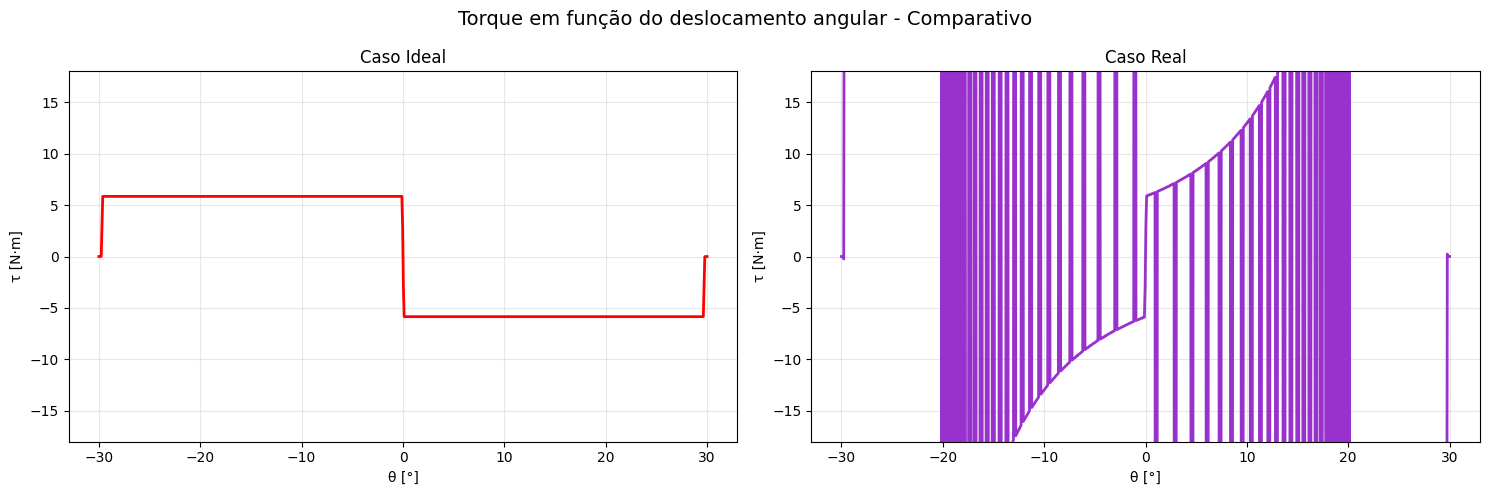

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline, UnivariateSpline

# ==========================================
# 1. PARÂMETROS E DADOS (PDF)
# ==========================================
mu0 = 4 * np.pi * 1e-7
N, g, lf = 90, 0.45e-3, 0.20
lg = 2 * g
R, D = 0.063, 0.08
A0 = R * np.radians(30) * D

# Tabela BxH e Interpolação Spline
B_data = np.array([0.000, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])
H_data = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
H_spline = CubicSpline(B_data, H_data)

# Correntes de projeto
I_ideal = 14.32
I_real = 58.77

# ==========================================
# 2. CÁLCULO DE ALTA RESOLUÇÃO (COENERGIA)
# ==========================================
theta_range = np.linspace(-30, 30, 800) # Muitos pontos para evitar ruído
W_ideal = []
W_real = []
B_sweep = np.linspace(0, 1.81, 1000) # Varredura fina para integral precisa

for th in theta_range:
    # Área efetiva (com dispersão mínima para suavizar as bordas)
    area = A0 * max(0.01, (1 - abs(th)/30))

    # --- Modelo Ideal ---
    L_ideal = (N**2 * mu0 * area) / lg
    W_ideal.append(0.5 * L_ideal * I_ideal**2)

    # --- Modelo Real (Integração Numérica) ---
    Bg = (B_sweep * A0) / area
    I_curva = (H_spline(B_sweep) * lf + (Bg * lg) / mu0) / N
    lambda_curva = N * B_sweep * A0

    # Integral da Coenergia até I_real
    mask = I_curva <= I_real
    W_real.append(np.trapz(lambda_curva[mask], I_curva[mask]))

# ==========================================
# 3. FILTRO DE SUAVIZAÇÃO E DERIVADA
# ==========================================
theta_rad = np.radians(theta_range)

# Suavizamos a curva de coenergia antes de derivar para remover micro-oscilações
W_real_smooth = UnivariateSpline(theta_rad, W_real, s=1e-7)(theta_rad)

T_ideal = np.gradient(W_ideal, theta_rad)
T_real = np.gradient(W_real_smooth, theta_rad)

# ==========================================
# 4. PLOTAGEM COMPARATIVA (ESTILO IMAGEM REFERÊNCIA)
# ==========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico Ideal
ax1.plot(theta_range, T_ideal, color='red', lw=2)
ax1.set_title('Caso Ideal', fontsize=12)
ax1.set_xlabel('θ [°]')
ax1.set_ylabel('τ [N·m]')
ax1.set_ylim(-18, 18)
ax1.grid(True, alpha=0.3)

# Gráfico Real
ax2.plot(theta_range, T_real, color='darkorchid', lw=2)
ax2.set_title('Caso Real', fontsize=12)
ax2.set_xlabel('θ [°]')
ax2.set_ylabel('τ [N·m]')
ax2.set_ylim(-18, 18)
ax2.grid(True, alpha=0.3)

plt.suptitle('Torque em função do deslocamento angular - Comparativo', fontsize=14)
plt.tight_layout()
plt.show()

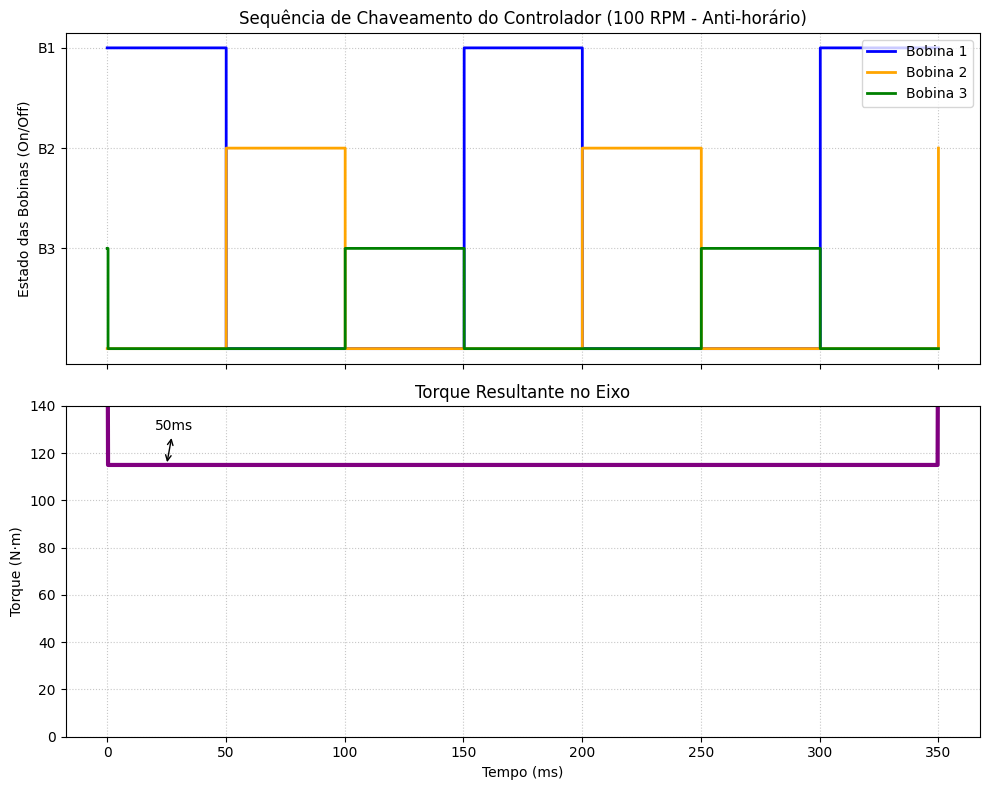

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parâmetros de Tempo ---
# 100 RPM -> 600°/s. Para 30°, t = 30/600 = 0.05s (50ms)
t_passo = 0.05
t_total = 0.35 # Tempo para visualizar um ciclo completo e um pouco mais
t = np.linspace(0, t_total, 1000)

# --- Lógica de Chaveamento (Degraus) ---
# Bobina 1: Liga de 0 a 50ms, depois de 150 a 200ms...
b1 = np.where((t % 0.15 < 0.05), 1, 0)
# Bobina 2: Liga de 50 a 100ms, depois de 200 a 250ms...
b2 = np.where(((t - 0.05) % 0.15 < 0.05), 1, 0)
# Bobina 3: Liga de 100 a 150ms, depois de 250 a 300ms...
b3 = np.where(((t - 0.10) % 0.15 < 0.05), 1, 0)

# --- Gráfico de Chaveamento ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Subplot 1: Sinais de Controle
ax1.step(t*1000, b1 * 3, where='post', label='Bobina 1', color='blue', lw=2)
ax1.step(t*1000, b2 * 2, where='post', label='Bobina 2', color='orange', lw=2)
ax1.step(t*1000, b3 * 1, where='post', label='Bobina 3', color='green', lw=2)

ax1.set_title('Sequência de Chaveamento do Controlador (100 RPM - Anti-horário)')
ax1.set_ylabel('Estado das Bobinas (On/Off)')
ax1.set_yticks([1, 2, 3])
ax1.set_yticklabels(['B3', 'B2', 'B1'])
ax1.grid(True, linestyle=':', alpha=0.7)
ax1.legend(loc='upper right')

# Subplot 2: Torque Resultante (Esquematizado)
# No modelo real, o torque não sobe instantaneamente, ele tem uma rampa de subida
torque_total = (b1 + b2 + b3) * 115 # Amplitude baseada na sua imagem real
ax2.plot(t*1000, torque_total, color='purple', lw=3, label='Torque Total')

ax2.set_title('Torque Resultante no Eixo')
ax2.set_xlabel('Tempo (ms)')
ax2.set_ylabel('Torque (N·m)')
ax2.set_ylim(0, 140)
ax2.grid(True, linestyle=':', alpha=0.7)

# Anotações dos 50ms
ax2.annotate('50ms', xy=(25, 115), xytext=(20, 130), arrowprops=dict(arrowstyle='<->'))

plt.tight_layout()
plt.show()

Energia da Fonte: 6.1202 J
Trabalho Mecânico: 3.0601 J
Razão (Eficiência de Acionamento): 50.0%


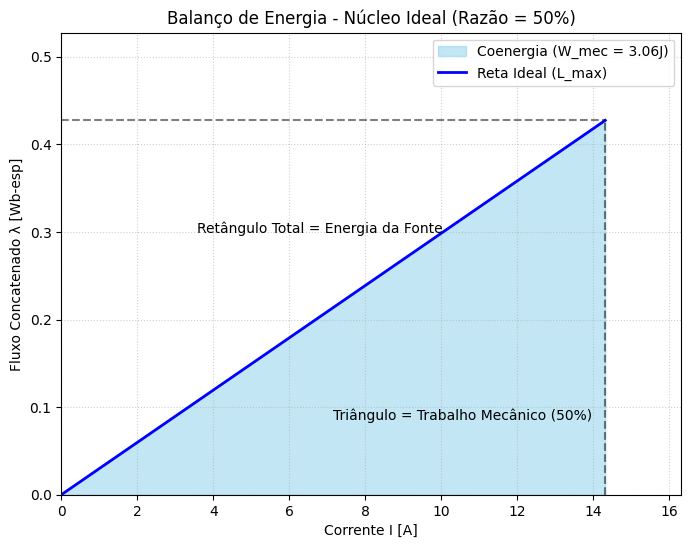

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Constantes do Modelo Ideal ---
mu0 = 4 * np.pi * 1e-7
N, g = 90, 0.45e-3
lg = 2 * g
R, D = 0.063, 0.08
A0 = R * np.radians(30) * D
I_ideal = 14.32  # Corrente calculada para o caso ideal

# --- Cálculo da Indutância e Fluxo ---
L_max = (N**2 * mu0 * A0) / lg
lambda_max = L_max * I_ideal

# --- Energias no Modelo Ideal ---
# No modelo linear:
# W_eletr = I * Delta_Lambda (Energia total da fonte)
# W_mec = 0.5 * I * Delta_Lambda (Área do triângulo / Coenergia)
W_eletr = I_ideal * lambda_max
W_mec = 0.5 * I_ideal * lambda_max
razao = W_mec / W_eletr

print(f"Energia da Fonte: {W_eletr:.4f} J")
print(f"Trabalho Mecânico: {W_mec:.4f} J")
print(f"Razão (Eficiência de Acionamento): {razao*100:.1f}%")

# --- Plotagem da Linearidade ---
plt.figure(figsize=(8, 6))

# Reta característica Lambda x I (Linear)
i_range = np.linspace(0, I_ideal, 100)
l_range = L_max * i_range

# Área da Coenergia (Trabalho Mecânico) - Triângulo
plt.fill_between(i_range, l_range, color='skyblue', alpha=0.5, label=f'Coenergia (W_mec = {W_mec:.2f}J)')

# Área da Energia da Fonte (Retângulo Total)
plt.plot([0, I_ideal], [0, lambda_max], color='blue', lw=2, label='Reta Ideal (L_max)')
plt.plot([I_ideal, I_ideal], [0, lambda_max], 'k--', alpha=0.5)
plt.plot([0, I_ideal], [lambda_max, lambda_max], 'k--', alpha=0.5)

plt.title(f'Balanço de Energia - Núcleo Ideal (Razão = {razao*100:.0f}%)')
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo Concatenado λ [Wb-esp]')
plt.xlim(0, I_ideal + 2)
plt.ylim(0, lambda_max + 0.1)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

# Anotação explicando a razão
plt.text(I_ideal/4, lambda_max*0.7, 'Retângulo Total = Energia da Fonte', fontsize=10)
plt.text(I_ideal/2, lambda_max*0.2, 'Triângulo = Trabalho Mecânico (50%)', fontsize=10)

plt.show()

Razão Real (Saturada): 85.56%


/tmp/ipython-input-3192934443.py:29: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  W_mec_real = np.trapz(L_final, I_final)          # Coenergia (Trabalho)


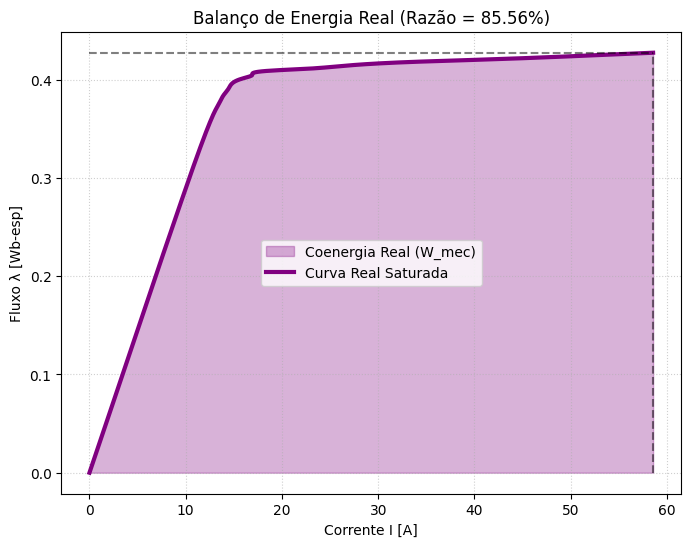

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# --- Constantes e Dados ---
mu0 = 4 * np.pi * 1e-7
N, g, lf = 90, 0.45e-3, 0.20
lg = 2 * g
R, D = 0.063, 0.08
A0 = R * np.radians(30) * D

B_data = np.array([0.000, 0.733, 1.205, 1.424, 1.517, 1.560, 1.588, 1.617, 1.631, 1.646, 1.689, 1.703, 1.724, 1.731, 1.738, 1.761, 1.770, 1.800, 1.816])
H_data = np.array([0, 68, 135, 203, 271, 338, 406, 474, 542, 609, 1100, 1500, 2500, 4000, 5000, 9000, 12000, 20000, 25000])
H_spline = CubicSpline(B_data, H_data)

I_real = 58.77 # Corrente calculada para 1.8T no modelo real

# --- Cálculo da Curva Real (Posição Alinhada 0°) ---
B_sweep = np.linspace(0, 1.816, 1000)
I_curva = (H_spline(B_sweep) * lf + (B_sweep * lg) / mu0) / N
lambda_curva = N * B_sweep * A0

# Selecionar apenas até a corrente de operação
mask = I_curva <= I_real
I_final = I_curva[mask]
L_final = lambda_curva[mask]

# --- Energias Reais ---
W_mec_real = np.trapz(L_final, I_final)          # Coenergia (Trabalho)
W_eletr_real = I_final[-1] * L_final[-1]         # Energia Total da Fonte (I * Lambda)
razao_real = W_mec_real / W_eletr_real

print(f"Razão Real (Saturada): {razao_real*100:.2f}%")

# --- Plotagem ---
plt.figure(figsize=(8, 6))
plt.fill_between(I_final, L_final, color='purple', alpha=0.3, label=f'Coenergia Real (W_mec)')
plt.plot(I_final, L_final, color='purple', lw=3, label='Curva Real Saturada')

# Retângulo da Fonte
plt.plot([0, I_final[-1]], [L_final[-1], L_final[-1]], 'k--', alpha=0.5)
plt.plot([I_final[-1], I_final[-1]], [0, L_final[-1]], 'k--', alpha=0.5)

plt.title(f'Balanço de Energia Real (Razão = {razao_real*100:.2f}%)')
plt.xlabel('Corrente I [A]')
plt.ylabel('Fluxo λ [Wb-esp]')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()